In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import joypy
import pandas as pd
from typing import List

In [2]:
environment = "BlocksObstacles"
file_array = np.loadtxt("data\{}\BlocksObstacles Run 1 newreward - DQN stack-depth(stopped) - RewardDistribution".format(environment))

In [9]:
environment = "BlocksObstacles"
file_array1 = np.loadtxt("data\{}\BlocksObstacles Run 5 - DQN stack-depth - RewardDistribution".format(environment))
file_array2 = np.loadtxt("data\{}\BlocksObstacles Run 1 newreward - DQN stack-depth(stopped) - RewardDistribution".format(environment))

In [3]:
counted         = file_array[:-1]
episodes        = file_array[-1]

frames          = np.arange(len(counted))

In [10]:
counted1         = file_array1[:-1]
episodes1        = file_array1[-1]

counted2         = file_array2[:-1]
episodes2        = file_array2[-1]


frames          = np.arange(len(counted1))

In [4]:
distribution    = counted/episodes

In [11]:
distribution1    = counted1/episodes1
distribution2    = counted2/episodes2

In [5]:
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]                                        # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

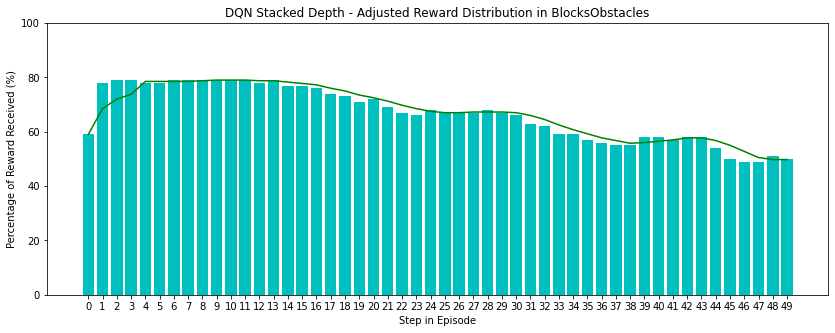

In [8]:
plt.figure(figsize=(14,5))
plt.title("DQN Stacked Depth - Adjusted Reward Distribution in {}".format(environment))
plt.ylim([0, 100])
plt.bar(frames, counted, color='c')
plt.plot(frames, np.array(pd.DataFrame(counted).rolling(4, min_periods=1).mean()), color='green')
plt.xlabel("Step in Episode")
plt.ylabel("Percentage of Reward Received (%)")
plt.xticks(frames)
plt.savefig("figures\Reward Distribution of {} NewardRun1".format(environment))
plt.show()

In [1]:
fig, axs = plt.subplots(2,2)

fig.set_size_inches(16, 10, forward=True)

custom_xlim = (0, 50)
custom_ylim = (0, 100)

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)

axs[0].bar(frames, counted1, color='c')
axs[0].plot(frames, np.array(pd.DataFrame(counted1).rolling(4, min_periods=1).mean()), color='green')
axs[0].set_title("Trained with Normal Reward", fontsize=12)

axs[1].bar(frames, counted2, color='c')
axs[1].plot(frames, np.array(pd.DataFrame(counted2).rolling(4, min_periods=1).mean()), color='green')
axs[1].set_title("Trained with Adjusted Reward", fontsize=12)

axs[1].set_xlabel("Step in Episode", fontsize=12)

fig.text(0.08, 0.5, 'Percentage of Reward Received (%)', ha='center', va='center', rotation='vertical')
plt.savefig("figures\Reward Distribution of {}".format(environment))


NameError: name 'plt' is not defined